In [1]:
import sys

In [2]:
sys.path.append('..')

In [3]:
from nbhd import data

Initializing database connection...
Database connected!


In [4]:
db = data.Base()

In [5]:
from nbhd.geography import Neighbourhood

In [6]:
n = Neighbourhood()

Getting data took 0 minutes, 0 seconds.


In [15]:
n.get_communities?

Signature:
n.get_communities(
    footprint_threshold=250,
    res_length_threshold=30,
    short_threshold=50,
    min_community_size=0,
    node_distance=30,
)
Docstring: <no docstring>
File:      ~/code/nbhd/geography.py
Type:      method


In [13]:
n.get_communities( footprint_threshold=250, 
                    res_length_threshold=30, 
                    short_threshold=30, 
                    min_community_size=0, 
                    node_distance=30)

In [9]:
import geopandas as gpd

In [10]:
import matplotlib.pyplot as plt

<AxesSubplot:>

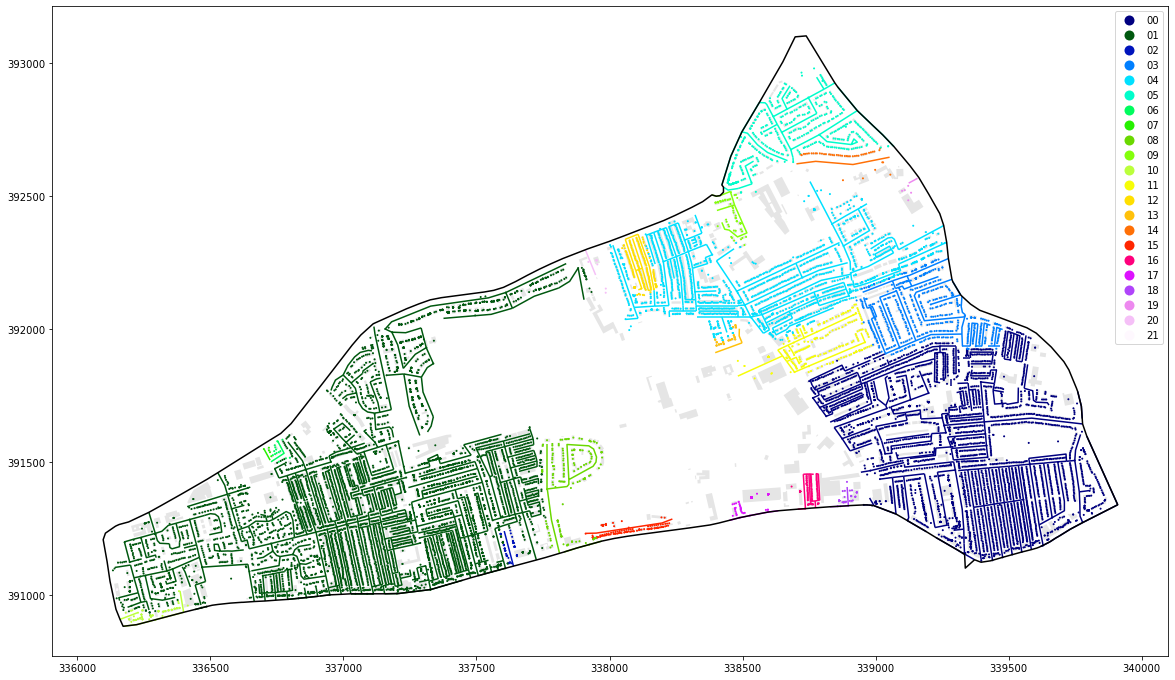

In [14]:
_fig, ax = plt.subplots(figsize=(20,20))
cmap='gist_ncar'
bdg_df = n.df[~n.df[['id_building']].duplicated()][['community', 'geometry_building']]
street_df = n.df[~n.df[['id_street']].duplicated()][['community', 'geometry_street']]

gpd.GeoDataFrame(street_df[['community']], 
                 geometry=gpd.GeoSeries(street_df.geometry_street)).plot(
    'community', cmap=cmap, ax=ax, markersize=1, alpha=1)
gpd.GeoDataFrame(bdg_df[['community']], 
                 geometry=gpd.GeoSeries(bdg_df.geometry_building)).plot(
    color='k', ax=ax, markersize=1, alpha=0.1)
gpd.GeoDataFrame(n.df[['community']], 
                 geometry=gpd.GeoSeries.from_wkb(n.df.uprn_geometry)).plot(
    'community', ax=ax, markersize=1, cmap=cmap, alpha=1, legend=True)

n.boundary.plot(ax=ax, linewidth=1.5, color='k')
# plt.savefig()